## Import Library

In [999]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import matplotlib
df = pd.read_csv('Cars.csv')


## Load Data

In [1000]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [1001]:
#Check amount of data
df.shape

(8128, 13)

In [1002]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [1003]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [1004]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## Feature Mapping

In [1005]:
#Data Mapping, First Owner = 1, ... , Test Drive Car = 5
df["owner"].unique()

mapping = {"First Owner" : 1, "Second Owner" : 2, "Third Owner" : 3, "Fourth & Above Owner" : 4, "Test Drive Car" : 5}

df["owner"] = df["owner"].map(mapping)

df["owner"].unique()

array([1, 2, 3, 4, 5])

In [1006]:
df = df[~df["fuel"].isin(["CNG", "LPG"])]

In [1007]:
df["mileage"] = df["mileage"].str.split().str[0]

df["mileage"] = df["mileage"].astype(float)

In [1008]:
df["engine"] = df["engine"].str.split().str[0]

df["engine"] = df["engine"].astype(float)

In [1009]:
df["max_power"] = df["max_power"].str.split().str[0]

df["max_power"] = df["max_power"].astype(float)

In [1010]:
df["name"] = df["name"].str.split(" ").str[0]

In [1011]:
df = df.drop(columns=['torque'])

In [1012]:
df = df[df['owner'] != 5]

In [1013]:
y = np.log(df['selling_price'])

In [1014]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [1015]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [1016]:
#renaming column 'name' to 'brand'
df.rename(columns= {
    'name': 'brand'}, inplace= True)

df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

## Univariate Analysis

<Axes: xlabel='owner', ylabel='count'>

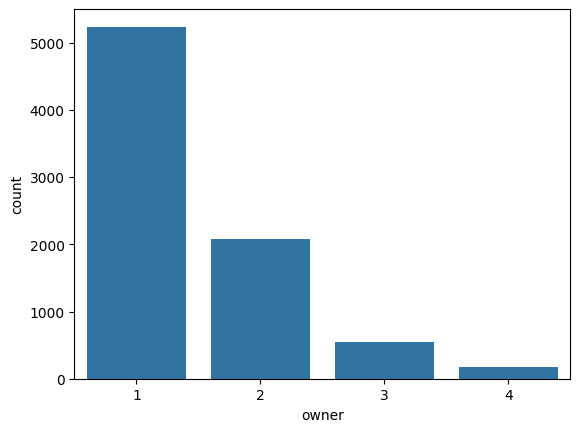

In [1017]:
#How many different owners are there?
sns.countplot(data = df, x = 'owner')

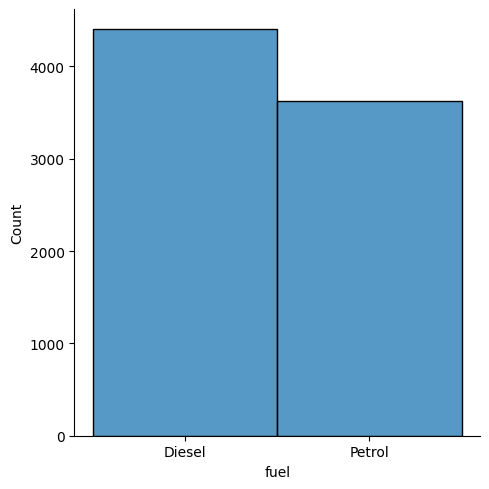

In [1018]:
sns.displot(data = df, x = 'fuel')

Text(0.5, 0, 'Fuel')

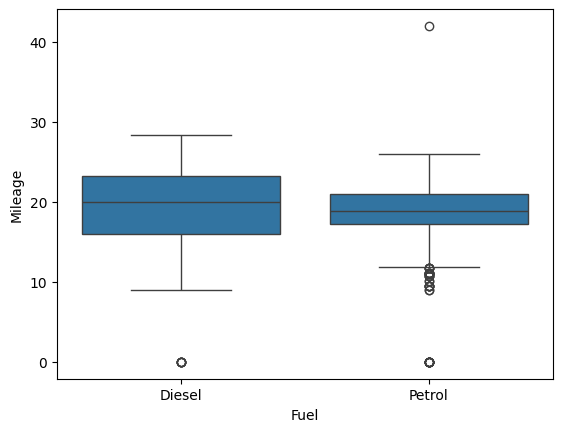

In [1019]:
#Multivariate Analysis
sns.boxplot(x = df["fuel"], y = df["mileage"]);
plt.ylabel("Mileage")
plt.xlabel("Fuel")

<Axes: xlabel='mileage', ylabel='selling_price'>

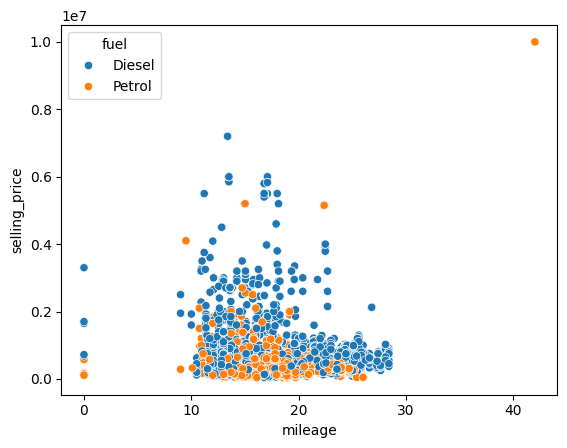

In [1020]:
sns.scatterplot(x = df['mileage'], y = df['selling_price'], hue=df['fuel'])

In [1021]:
from sklearn.preprocessing import LabelEncoder
#do label encoding for fuel
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])

#do label encoding for transmission
le = LabelEncoder()
df['transmission'] = le.fit_transform(df['transmission'])

## Heat Map

<Axes: >

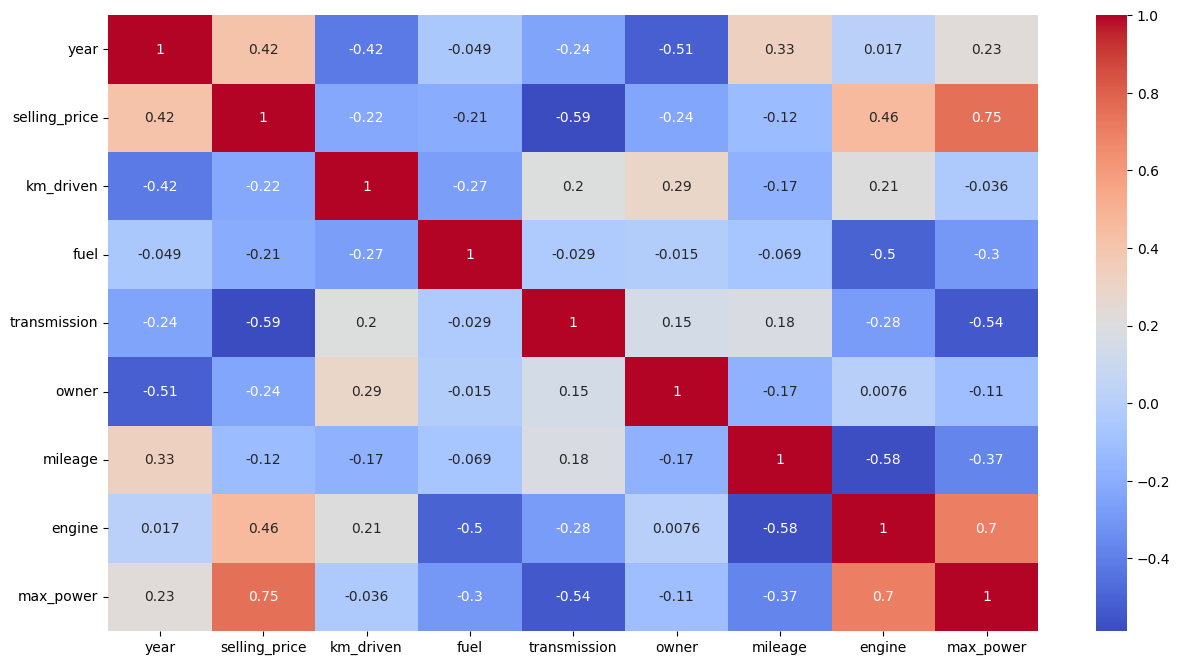

In [1022]:
#drop brand columns
df = df.drop(columns=['brand'])

# Drop the original 'seller_type' column if it's no longer needed
df = df.drop(columns=['seller_type'])

# Drop the original 'seats' column if it's no longer needed
df = df.drop(columns=['seats'])

# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## Null Values

In [1023]:
#Check for Null Values
df.isna().sum()

year               0
selling_price      0
km_driven          0
fuel               0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
dtype: int64

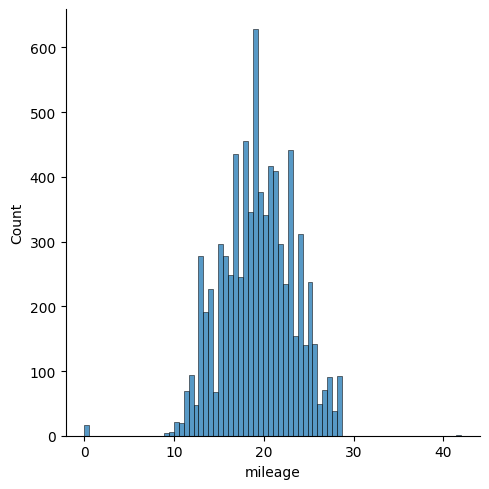

In [1024]:
sns.displot(df.mileage)

In [1025]:
#Fill out mileage with mean

df['mileage'].fillna(df['mileage'].mean(), inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12256\2088284964.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage'].fillna(df['mileage'].mean(), inplace=True)


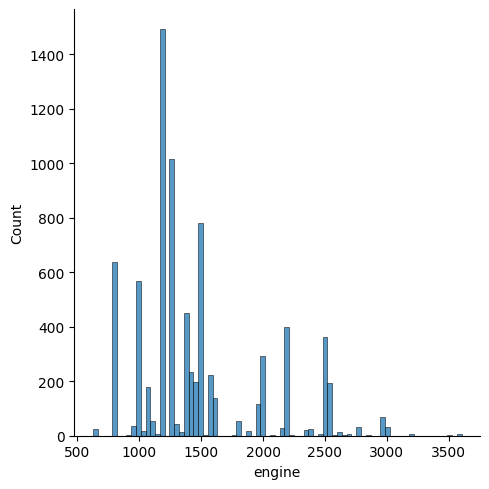

In [1026]:
sns.displot(df.engine)

In [1027]:
#Fill out engine with median

df['engine'].fillna(df['engine'].median(), inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12256\2990182329.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engine'].fillna(df['engine'].median(), inplace=True)


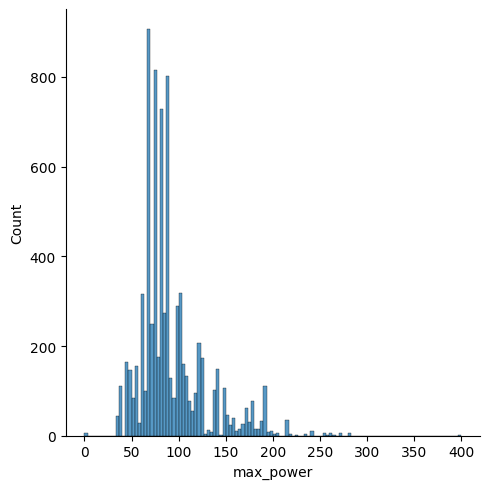

In [1028]:
sns.displot(df.max_power)

In [1029]:
#Fill out max_power with median

df['max_power'].fillna(df['max_power'].median(), inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12256\1770132938.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max_power'].fillna(df['max_power'].median(), inplace=True)


In [1030]:
#check the missing value in df data set
df.isna().sum()

year             0
selling_price    0
km_driven        0
fuel             0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
dtype: int64

## Modeling

In [1031]:
import ssl
import certifi

ssl._create_default_https_context = ssl._create_unverified_context

In [1032]:
#experiment tracking
import mlflow
import os
import requests
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th/")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "takdanai"
os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
# Define username and password
# username = "admin"
# password = "password"

# Authenticate with MLflow
# mlflow.get_tracking_uri()
# session = requests.Session()
# session.auth = (username, password)
mlflow.set_experiment(experiment_name="st126127-a3")

<Experiment: artifact_location='mlflow-artifacts:/700563009768024371', creation_time=1759472657966, experiment_id='700563009768024371', last_update_time=1759472657966, lifecycle_stage='active', name='st126127-a3', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [1033]:
#x is our strong features
X = df[["year", "mileage", "km_driven", "owner"]]

#y is simply the life expectancy col
y = np.log(df['selling_price'])

Train Test Split

In [1034]:
from sklearn.model_selection import train_test_split

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

# Check if X contain (samples, features), and y contain (samples, )
assert X_train.ndim == 2
assert X_test.ndim  == 2
assert y_train.ndim == 1


# Check the shapes of the resulting datasets
print("Training features shape: ", X_train.shape) #% of the rows, # of features
print("Testing features shape: ", X_test.shape)
print("Training target shape: ", y_train.shape)
print("Testing target shape: ", y_test.shape)

Training features shape:  (6422, 4)
Testing features shape:  (1606, 4)
Training target shape:  (6422,)
Testing target shape:  (1606,)


In [1035]:
#Convert Data to Numpy Arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train) 
y_test = np.array(y_test)  

In [1036]:
from sklearn.preprocessing import StandardScaler
# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1037]:
# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1) 
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1) #add intercept

In [1066]:
X_train.shape

(6422, 5)

## Testing

In [1038]:
# Convert continuous price into categories (4 bins)
y_train = pd.cut(y_train, bins=4, labels=[0, 1, 2, 3]).astype(int)
y_test = pd.cut(y_test, bins=4, labels=[0, 1, 2, 3]).astype(int)

# Correct one-hot encoding
k = len(np.unique(y_train))  # Should now be 4
m = X_train.shape[0]  # Number of samples

Y_train_encoded = np.zeros((m, k))
for i, label in enumerate(y_train):
    Y_train_encoded[i, label] = 1  # Corrected indexing

In [1039]:
# Convert continuous price into categories (4 bins)
y_train = pd.cut(y_train, bins=4, labels=[0, 1, 2, 3]).astype(int)
y_test = pd.cut(y_test, bins=4, labels=[0, 1, 2, 3]).astype(int)

# Correct one-hot encoding
k = len(np.unique(y_train))  # Should now be 4
m = X_train.shape[0]  # Number of samples

Y_train_encoded = np.zeros((m, k))
for i, label in enumerate(y_train):
    Y_train_encoded[i, label] = 1  # Corrected indexing

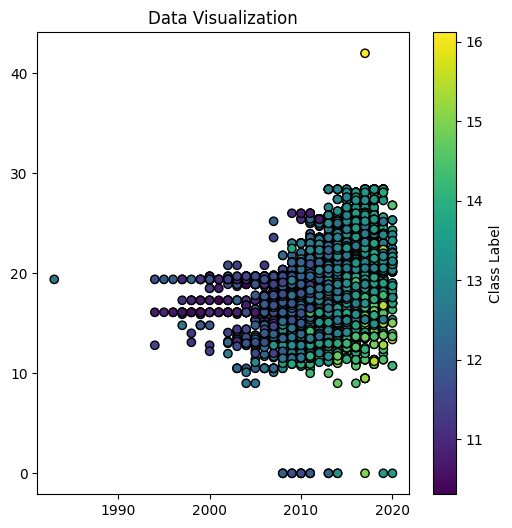

In [1040]:
X = np.array(X)  # Ensure it's a NumPy array
y = np.array(y).flatten() 

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')  # Fixes applied
plt.colorbar(label='Class Label')  # Show class color mapping
plt.title("Data Visualization")
plt.show()

## Classification

In [1041]:
import time
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    
    def __init__(self, k, n, method="batch", alpha=0.003, max_iter=5000, class_weights=None, lam=0.0):
        self.k = k  # Number of classes
        self.n = n  # Number of features + intercept
        self.alpha = alpha  # Learning rate
        self.max_iter = max_iter  # Number of iterations
        self.method = method  # Optimization method
        self.class_weights = class_weights  # Class weights for handling imbalance
        self.lam = lam  # Ridge regularization parameter

    def fit(self, X, Y):
        # Ensure numpy arrays (avoid pandas issues)
        X = np.array(X)
        Y = np.array(Y)

        self.W = np.random.randn(self.n, self.k) * 0.05  # Initialize weights
        self.losses = []
        self.velocity = np.zeros_like(self.W)  # For momentum
        beta = 0.9  # Momentum factor
        
        start_time = time.time()
        for i in range(self.max_iter):
            loss, grad = self.gradient(X, Y)
            
            # Clip gradients to prevent explosion
            grad = np.clip(grad, -1, 1)

            self.losses.append(loss)

            # Momentum update
            self.velocity = beta * self.velocity + (1 - beta) * grad  
            self.W -= self.alpha * self.velocity  

            # Print progress every 500 iterations
            if i % 500 == 0:
                print(f"Loss at iteration {i}: {loss:.4f}")
                print("Gradient norm:", np.linalg.norm(grad))

        print(f"Training time: {time.time() - start_time:.2f} seconds")

    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)  # Softmax probabilities

        # One-hot encode Y if needed
        if Y.ndim == 1:
            Y_onehot = np.zeros((m, self.k))
            Y_onehot[np.arange(m), Y] = 1
        else:
            Y_onehot = Y

        # Apply class weights if provided
        if self.class_weights:
            weight_matrix = np.array([self.class_weights.get(c, 1) for c in range(self.k)])
            weighted_Y = Y_onehot * weight_matrix
        else:
            weighted_Y = Y_onehot

        # Compute loss with ridge penalty
        loss = -np.sum(weighted_Y * np.log(h + 1e-12)) / m
        if self.lam > 0:
            loss += (self.lam / (2 * m)) * np.sum(self.W**2)

        # Compute gradient with ridge penalty
        error = h - Y_onehot
        grad = (X.T @ error) / m
        if self.lam > 0:
            grad += (self.lam / m) * self.W

        return loss, grad

    def softmax(self, logits):
        """ Numerically stable softmax """
        logits = np.clip(logits, -500, 500)  
        logits -= np.max(logits, axis=1, keepdims=True)  # Stability
        exp_vals = np.exp(logits)
        return exp_vals / (np.sum(exp_vals, axis=1, keepdims=True) + 1e-12)

    def h_theta(self, X, W):
        """ Compute probability predictions """
        X = np.array(X)  # ensure numpy
        return self.softmax(X @ W)

    def predict(self, X_test):
        """ Return class predictions """
        X_test = np.array(X_test)
        return np.argmax(self.h_theta(X_test, self.W), axis=1)

    def accuracy(self, X_test, y_true):
        """ Compute accuracy """
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_true)

    def plot(self):
        """ Plot loss over iterations """
        plt.plot(np.arange(len(self.losses)), self.losses, label="Training Loss")
        plt.title("Loss over Iterations")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

## Run Algorithm

Loss at iteration 0: 1.3719
Gradient norm: 0.5377817078201442
Loss at iteration 500: 1.2498
Gradient norm: 0.45933809328042824
Loss at iteration 1000: 1.1588
Gradient norm: 0.3940538433753893
Loss at iteration 1500: 1.0912
Gradient norm: 0.34180387389244077
Loss at iteration 2000: 1.0397
Gradient norm: 0.30011089654340795
Loss at iteration 2500: 0.9996
Gradient norm: 0.266595321773345
Loss at iteration 3000: 0.9677
Gradient norm: 0.23934675217612247
Loss at iteration 3500: 0.9416
Gradient norm: 0.2169253324914398
Loss at iteration 4000: 0.9201
Gradient norm: 0.1982621236411824
Loss at iteration 4500: 0.9020
Gradient norm: 0.1825614859471104
Training time: 3.40 seconds
Model Accuracy: 0.6183


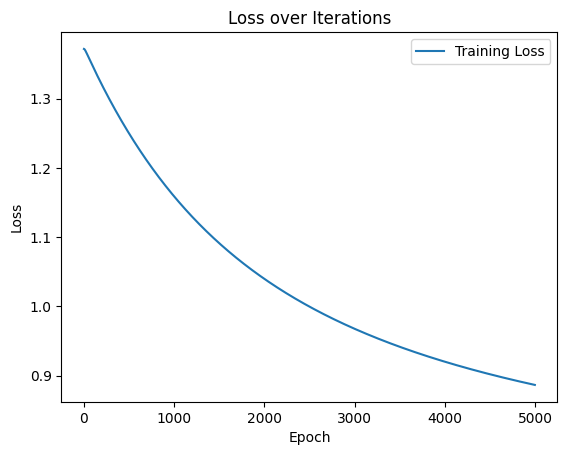

========= Classification Report =======
              precision    recall  f1-score   support

           0       0.50      0.01      0.03        75
           1       0.55      0.86      0.67       617
           2       0.72      0.57      0.64       810
           3       0.00      0.00      0.00       104

    accuracy                           0.62      1606
   macro avg       0.44      0.36      0.33      1606
weighted avg       0.60      0.62      0.58      1606



d:\A3_Car_Price\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\A3_Car_Price\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\A3_Car_Price\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [1042]:
# Initialize and train the model
class_model = LogisticRegression(k=k, n=X_train.shape[1], method="minibatch", alpha=0.001, max_iter=5000)
class_model.fit(X_train, Y_train_encoded)

# Predictions
yhat = class_model.predict(X_test)

# Compute accuracy
accuracy = class_model.accuracy(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")

# Plot loss curve
class_model.plot()

# Generate classification report
from sklearn.metrics import classification_report
print("========= Classification Report =======")
print(classification_report(y_test, yhat))

In [1043]:
#Ensure that the model actually learn
print("Y_train_encoded shape:", Y_train_encoded.shape)  # Should be (m, k)
print("First few Y_train_encoded rows:\n", Y_train_encoded[:5])

Y_train_encoded shape: (6422, 4)
First few Y_train_encoded rows:
 [[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


Macro Precision, Macro Recall, Macro F1

In [1044]:
from sklearn.metrics import precision_score, recall_score, f1_score

def compute_macro_metrics(y_true, y_pred):
    macro_precision = precision_score(y_true, y_pred, average="macro")
    macro_recall = recall_score(y_true, y_pred, average="macro")
    macro_f1 = f1_score(y_true, y_pred, average="macro")
    
    print(f"Macro Precision: {macro_precision:.4f}")
    print(f"Macro Recall: {macro_recall:.4f}")
    print(f"Macro F1-score: {macro_f1:.4f}")
    
    return macro_precision, macro_recall, macro_f1

# Example usage:
macro_precision, macro_recall, macro_f1 = compute_macro_metrics(y_test, yhat)

Macro Precision: 0.4421
Macro Recall: 0.3605
Macro F1-score: 0.3334


d:\A3_Car_Price\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Weighted Precision, Weighted Recall, and Weighted F1

In [1045]:
from sklearn.metrics import precision_score, recall_score, f1_score

def compute_weighted_metrics(y_true, y_pred):
    weighted_precision = precision_score(y_true, y_pred, average="weighted")
    weighted_recall = recall_score(y_true, y_pred, average="weighted")
    weighted_f1 = f1_score(y_true, y_pred, average="weighted")
    
    print(f"Weighted Precision: {weighted_precision:.4f}")
    print(f"Weighted Recall: {weighted_recall:.4f}")
    print(f"Weighted F1-score: {weighted_f1:.4f}")
    
    return weighted_precision, weighted_recall, weighted_f1

# Example usage:
weighted_precision, weighted_recall, weighted_f1 = compute_weighted_metrics(y_test, yhat)

Weighted Precision: 0.5967
Weighted Recall: 0.6183
Weighted F1-score: 0.5801


d:\A3_Car_Price\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Compare Your Implementation with classification_report in Scikit-Learn

In [1046]:
import numpy as np
from sklearn.metrics import classification_report

# Generate mock data (10 samples, 4 classes)
np.random.seed(42)
y_true = np.random.randint(0, 4, 10)  # True labels (random 0-3)
y_pred = np.random.randint(0, 4, 10)  # Predicted labels (random 0-3)

print("True labels:", y_true)
print("Predicted labels:", y_pred)

True labels: [2 3 0 2 2 3 0 0 2 1]
Predicted labels: [2 2 2 2 3 0 3 3 3 2]


Calculate Precision, Recall, f1

In [1047]:
def manual_macro_metrics(y_true, y_pred):
    from sklearn.metrics import precision_score, recall_score, f1_score
    import numpy as np

    # Compute precision, recall, and F1-score per class
    per_class_precision = precision_score(y_true, y_pred, average=None)
    per_class_recall = recall_score(y_true, y_pred, average=None)
    per_class_f1 = f1_score(y_true, y_pred, average=None)

    # Macro averaging: mean of all class scores
    macro_precision = np.mean(per_class_precision)
    macro_recall = np.mean(per_class_recall)
    macro_f1 = np.mean(per_class_f1)
    
    print("\n===== Manual Computation =====")
    print(f"Macro Precision: {macro_precision:.4f}")
    print(f"Macro Recall: {macro_recall:.4f}")
    print(f"Macro F1-score: {macro_f1:.4f}")

    return macro_precision, macro_recall, macro_f1

manual_macro_metrics(y_true, y_pred)


===== Manual Computation =====
Macro Precision: 0.1000
Macro Recall: 0.1250
Macro F1-score: 0.1111


d:\A3_Car_Price\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


(np.float64(0.1), np.float64(0.125), np.float64(0.1111111111111111))

Compare

In [1048]:
print("\n===== Scikit-Learn Classification Report =====")
print(classification_report(y_true, y_pred, digits=4))


===== Scikit-Learn Classification Report =====
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         3
           1     0.0000    0.0000    0.0000         1
           2     0.4000    0.5000    0.4444         4
           3     0.0000    0.0000    0.0000         2

    accuracy                         0.2000        10
   macro avg     0.1000    0.1250    0.1111        10
weighted avg     0.1600    0.2000    0.1778        10



d:\A3_Car_Price\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\A3_Car_Price\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\A3_Car_Price\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


What Does "Support" Mean in the Classification Report?

Answer:

Support represents the number of actual occurrences of each class in the dataset (y_true). It helps detect class imbalance (e.g., when some classes appear more frequently than others) and indicates whether a class has enough samples for meaningful evaluation. If support is too low, metrics like precision and recall may be unreliable.

In [1049]:
# Start MLflow Run
with mlflow.start_run():
    mlflow.log_param("model_type", "Classification")
    
    # Log model ONLY, without dataset
    mlflow.sklearn.log_model(class_model, "classification_model")
    
    # Save model locally
    mlflow.sklearn.save_model(class_model, "classification_saved_model2")

print("Model saved successfully!")

2025/10/03 14:24:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/03 14:24:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run stylish-squirrel-500 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/700563009768024371/runs/b4e75b16010c475fad8bf3ce57cc9cb2
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/700563009768024371
Model saved successfully!


## Ridge Logistic Regression

In [1050]:
import time
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, k, n, method="batch", alpha=0.003, max_iter=5000, lambda_=0.0):
        self.k = k                   # Number of classes
        self.n = n                   # Number of features
        self.alpha = alpha           # Learning rate
        self.max_iter = max_iter     # Iterations
        self.method = method         # Optimization method
        self.lambda_ = lambda_       # Ridge penalty strength (L2)

    def fit(self, X, Y):
        # ✅ Force numpy arrays to avoid pandas errors
        X = np.array(X)
        Y = np.array(Y)

        self.W = np.random.randn(self.n, self.k) * 0.05  # Weight initialization
        self.losses = []

        start_time = time.time()
        for i in range(self.max_iter):
            loss, grad = self.gradient(X, Y)

            # Weight update with ridge (applied in gradient)
            self.W -= self.alpha * grad

            self.losses.append(loss)

            if i % 500 == 0:
                print(f"Iter {i}, Loss: {loss:.4f}")

        print(f"Training finished in {time.time()-start_time:.2f} sec")

    def gradient(self, X, Y):
        """ Compute loss and gradient with optional L2 regularization """
        X = np.array(X)
        Y = np.array(Y)

        m = X.shape[0]
        h = self.h_theta(X, self.W)  # Softmax predictions

        # One-hot encode Y if still 1D
        if Y.ndim == 1:
            Y_onehot = np.zeros((m, self.k))
            Y_onehot[np.arange(m), Y] = 1
        else:
            Y_onehot = Y

        # Loss with ridge regularization
        loss = -np.sum(Y_onehot * np.log(h + 1e-12)) / m
        if self.lambda_ > 0:
            loss += (self.lambda_ / (2 * m)) * np.sum(self.W**2)

        # Gradient with ridge regularization
        error = h - Y_onehot
        grad = (X.T @ error) / m
        if self.lambda_ > 0:
            grad += (self.lambda_ / m) * self.W

        return loss, grad

    def h_theta(self, X, W):
        """ Compute probabilities using stable softmax """
        X = np.array(X)  # ✅ ensure numpy array
        logits = X @ W
        logits -= np.max(logits, axis=1, keepdims=True)  # stability trick
        exp_vals = np.exp(logits)
        return exp_vals / (np.sum(exp_vals, axis=1, keepdims=True) + 1e-12)

    def predict(self, X):
        X = np.array(X)
        return np.argmax(self.h_theta(X, self.W), axis=1)

    def accuracy(self, X, y_true):
        y_pred = self.predict(X)
        return np.mean(y_pred == y_true)

    def plot(self):
        plt.plot(np.arange(len(self.losses)), self.losses, label="Training Loss")
        plt.title("Loss over Iterations")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

In [1051]:
# ✅ Train Model WITHOUT Regularization (Standard Logistic Regression)
model = LogisticRegression(k=k, n=X_train.shape[1], method="minibatch", alpha=0.0001, max_iter=5000, lambda_=0.0)
model.fit(X_train, Y_train_encoded)

print("-----------------Penalty (lambda) is applied-----------------")

# ✅ Train Model WITH Ridge Regularization (L2 Regularization Applied)
ridge_model = LogisticRegression(k=k, n=X_train.shape[1], method="minibatch", alpha=0.0001, max_iter=5000, lambda_=0.001)
ridge_model.fit(X_train, Y_train_encoded)

Iter 0, Loss: 1.3719
Iter 500, Loss: 1.3576
Iter 1000, Loss: 1.3439
Iter 1500, Loss: 1.3305
Iter 2000, Loss: 1.3176
Iter 2500, Loss: 1.3051
Iter 3000, Loss: 1.2930
Iter 3500, Loss: 1.2812
Iter 4000, Loss: 1.2699
Iter 4500, Loss: 1.2589
Training finished in 3.49 sec
-----------------Penalty (lambda) is applied-----------------
Iter 0, Loss: 1.4089
Iter 500, Loss: 1.3937
Iter 1000, Loss: 1.3789
Iter 1500, Loss: 1.3646
Iter 2000, Loss: 1.3507
Iter 2500, Loss: 1.3373
Iter 3000, Loss: 1.3242
Iter 3500, Loss: 1.3116
Iter 4000, Loss: 1.2994
Iter 4500, Loss: 1.2876
Training finished in 3.71 sec


In [1052]:
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient

model_name = "st126127-a3-model"

with mlflow.start_run() as run:
    mlflow.log_param("model_type", "Ridge_Regression")

    # Log model to run
    mlflow.sklearn.log_model(model, "Ridge_Regression_model")

    # Register model in the registry
    model_uri = f"runs:/{run.info.run_id}/Ridge_Regression_model"
    result = mlflow.register_model(model_uri, model_name)

print(f"Model registered: {result.name}, version: {result.version}")

2025/10/03 14:24:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/03 14:25:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'st126127-a3-model' already exists. Creating a new version of this model...
2025/10/03 14:25:02 WARNING mlflow.tracking._model_registry.fluent: Run with id 92853ab504564932ae92e18d2861c74a has no artifacts at artifact path 'Ridge_Regression_model', registering model based on models:/m-8ea2843a966949c2b9bca1694465614d instead
2025/10/03 14:25:03 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: st126127-a3-model, version 5
Created version '5' of model 'st126127-a3-model'.


🏃 View run placid-dove-340 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/700563009768024371/runs/92853ab504564932ae92e18d2861c74a
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/700563009768024371
Model registered: st126127-a3-model, version: 5


In [1053]:
# # Start MLflow Run
# with mlflow.start_run():
#     mlflow.log_param("model_type", "Ridge_Regression")
    
#     # Log model ONLY, without dataset
#     mlflow.sklearn.log_model(model, "Ridge_Regression_model")
    
#     # Save model locally
#     mlflow.sklearn.save_model(model, "Ridge_Regression_saved_model")

# print("Model saved successfully!")

In [1054]:
client = mlflow.tracking.MlflowClient()

# Specify the model name and version
model_name = "st126127-a3-model"
model_version = 4  # Update with the correct version

# Transition model to Staging
client.transition_model_version_stage(
    name=model_name,
    version=model_version,
    stage="Staging"
)

print(f"Model {model_name} version {model_version} is now in Staging.")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12256\231094975.py:8: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


Model st126127-a3-model version 4 is now in Staging.


In [1055]:
model_version_info = client.get_model_version(
    name="st126127-a3-model",
    version=model_version
)

print(f"Model {model_version_info.name} (Version {model_version_info.version}) is in stage: {model_version_info.current_stage}")

Model st126127-a3-model (Version 4) is in stage: Staging


## Inference

In [1056]:
import pickle
from sklearn.linear_model import LogisticRegression

# Create and train model
class_model = LogisticRegression()
class_model.fit(X_train, y_train)  # Ensure model is trained

# Save the model correctly
filename = 'selling_price3.model'
with open(filename, 'wb') as f:
    pickle.dump(class_model, f)

In [1057]:
import mlflow.sklearn

model_uri = "models:/st126127-a3-model/1"  # Replace with actual model name
sklearn_model = mlflow.sklearn.load_model(model_uri)

In [1058]:
loaded_model = pickle.load(open(filename, 'rb'))    

In [1059]:
df[["year", "mileage", "km_driven", "owner", "selling_price"]].loc[1]


year               2014.00
mileage              21.14
km_driven        120000.00
owner                 2.00
selling_price    370000.00
Name: 1, dtype: float64

In [ ]:
sample = np.array([[1, 2014, 21.14, 120000.00, 2.00]]) #bias #year #mileage #km_driven #owner
sample = sample.reshape(1, -1)

In [1069]:
selling_price_3= loaded_model.predict(sample)
selling_price_3

array([2])

In [1070]:
selling_price_3 = sklearn_model.predict(sample)
selling_price_3

array([0])